In [28]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from collections import Counter
import seaborn as sns
from sklearn.datasets import fetch_covtype
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,f1_score, roc_curve

In [29]:

covtype = fetch_covtype()

X_500 = covtype.data[:500]
y_500 = covtype.target[:500]

df_500 = pd.DataFrame(X_500, columns=covtype.feature_names)
df_500['Cover_Type'] = y_500

df_500.head()


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Cover_Type
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


In [30]:
x = X_500
y = y_500
x

array([[2.596e+03, 5.100e+01, 3.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.590e+03, 5.600e+01, 2.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.804e+03, 1.390e+02, 9.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [2.900e+03, 1.800e+02, 3.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.867e+03, 1.430e+02, 1.200e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [3.047e+03, 3.560e+02, 1.000e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00]], shape=(500, 54))

In [31]:
y

array([5, 5, 2, 2, 5, 2, 5, 5, 5, 5, 5, 2, 2, 5, 5, 5, 5, 5, 5, 5, 5, 2,
       5, 5, 5, 5, 5, 2, 2, 5, 5, 5, 5, 5, 5, 2, 5, 5, 5, 5, 1, 2, 5, 5,
       2, 5, 5, 5, 5, 5, 5, 1, 1, 5, 5, 1, 5, 5, 5, 5, 5, 2, 2, 5, 5, 5,
       5, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2,
       1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2,
       2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1,
       2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2,
       2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2,
       2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2,
       1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1,
       2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2,

In [32]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x,y, test_size=0.2, random_state=42)

In [21]:
def KNN(x_train, y_train, x_text,k):
    y_pred = []
    for sample in x_text:
        distances = [np.linalg.norm(np.array(sample)- np.array(x_train_sample)) for x_train_sample in x_train]
        votes = np.argsort(distances)[:k]
        vote_class = [y_train[i] for i in votes]
        vote_result = Counter(vote_class).most_common()[0][0]
        print(vote_result)
        y_pred.append(vote_result)

    return np.array(y_pred)


In [33]:
Y_pred = KNN(x_train =x_train1, y_train = y_train1, x_text= x_test1, k =5)

2
1
2
2
2
5
2
2
2
2
5
2
1
2
2
2
2
5
2
2
2
2
1
2
2
2
2
2
2
2
5
1
1
2
2
2
1
2
2
5
5
2
1
1
5
2
5
1
1
5
2
2
2
1
1
5
2
5
1
2
2
1
1
2
1
5
2
5
2
5
2
2
2
2
2
1
1
5
2
2
1
2
2
2
2
2
2
1
2
2
1
2
2
1
2
1
2
1
2
5


In [34]:
accuracy = accuracy_score(y_test1, Y_pred)
accuracy

0.84

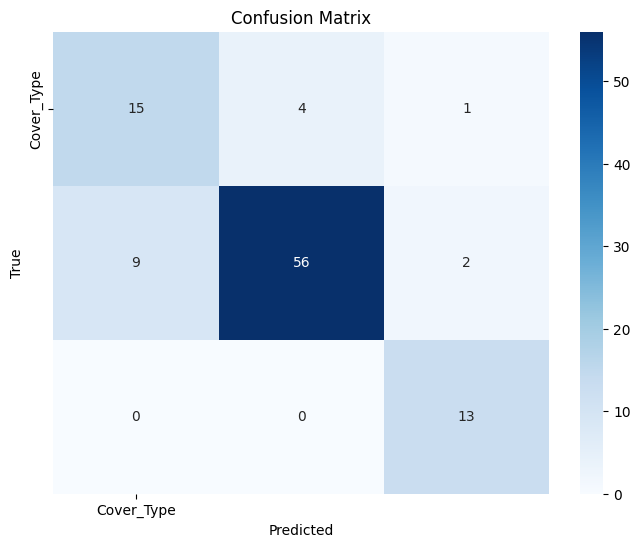

In [37]:
conf_matrix = confusion_matrix(y_test1, Y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(data= conf_matrix, annot=True, cmap='Blues', xticklabels=covtype.target_names, yticklabels=covtype.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [35]:
cl_report = classification_report(y_test1, Y_pred)
print("Classification Report:\n", cl_report)

Classification Report:
               precision    recall  f1-score   support

           1       0.62      0.75      0.68        20
           2       0.93      0.84      0.88        67
           5       0.81      1.00      0.90        13

    accuracy                           0.84       100
   macro avg       0.79      0.86      0.82       100
weighted avg       0.86      0.84      0.84       100



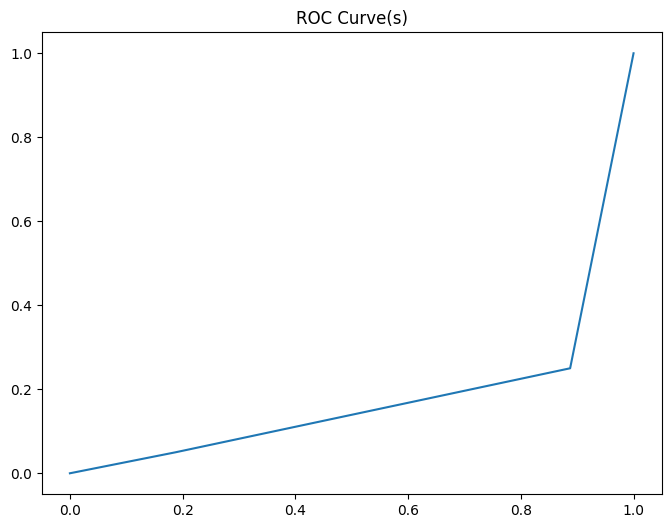

In [39]:
fpr, tpr, thresholds = roc_curve(y_test1, Y_pred, pos_label=1)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr)
plt.title('ROC Curve(s)')
plt.show()